In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import random
from collections import Counter, defaultdict

import scipy
from scipy.stats import multivariate_normal

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

py.init_notebook_mode(connected=True)

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

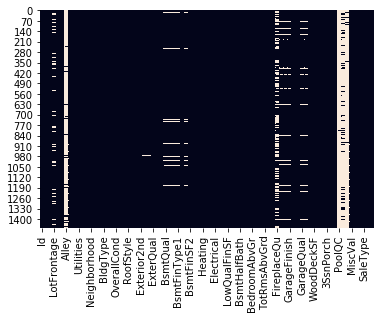

In [39]:
# plot 1
sns.heatmap(train.isnull(), cbar=False)
plt.savefig("E:/eda plots/plot1.jpg", bbox_inches='tight')

In [11]:
train.shape

(1460, 81)

In [30]:
train_copy = train.copy()
train_copy.dropna(inplace=True)
train_copy.shape

(0, 81)

In [33]:
print(train.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
# how many variables have null value
train.isnull().any().sum()

19

In [35]:
def object_vcs_and_nulls(df):
  for i in df:
    if df[i].dtype == 'O':
      if df[i].isnull().sum() > 0:
        print(df[i].value_counts())  
        print("Number of Null Values: " + str(df[i].isnull().sum()))
        print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum() / 14.60), 2)) + "%")
        print("\n")
      
object_vcs_and_nulls(train)

Grvl    50
Pave    41
Name: Alley, dtype: int64
Number of Null Values: 1369
Percentage of Nulls = 93.77%


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Number of Null Values: 8
Percentage of Nulls = 0.55%


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


SBrkr    1334
FuseA      94
FuseF      27
FuseP   

### Imputaion

In [74]:
nums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
def replace_na_numeric(df):
    for i in df:
        if df[i].dtype in nums:
            df.fillna(0, inplace=True)

In [75]:
def replace_na_categorical(df):
    for i in df:
        if df[i].dtype is 'category':
            df.fillna('None', inplace=True)

In [76]:
df_train = train.copy()

In [77]:
replace_na_numeric(df_train)

In [78]:
replace_na_categorical(df_train)

In [79]:
df_train.shape

(1460, 81)

In [80]:
df_train.isna().any().sum()

0

### Correlation Analysis

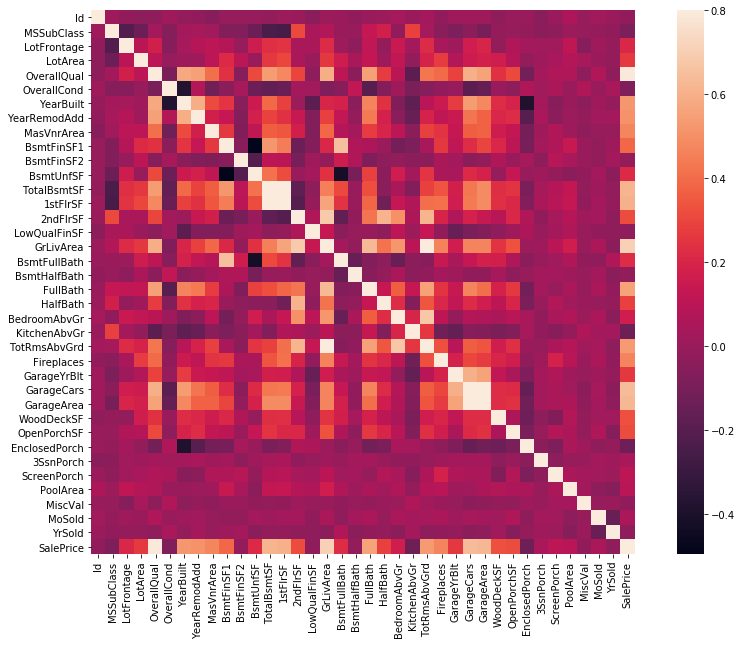

In [81]:
# correlation 'plot 2'
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(), vmax=.8, square=True)
plt.savefig("E:/eda plots/plot2.jpg", bbox_inches='tight')

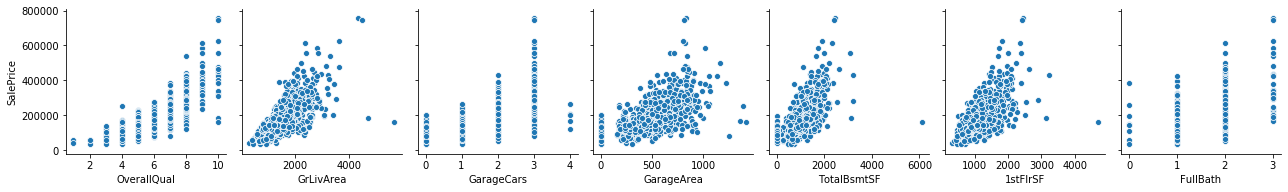

<Figure size 432x288 with 0 Axes>

In [82]:
# correl plots 'plot 3'
var = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',  '1stFlrSF', 'FullBath']
sns.pairplot(x_vars = var, y_vars = 'SalePrice', data = df_train)
plt.show()

In [84]:
# correlation magnitude 'plot 4'
corr_list = sorted(df_train.corr().to_dict()['SalePrice'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126511),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867),
 ('MasVnrArea', 0.47261449900457725),
 ('Fireplaces', 0.4669288367515242),
 ('BsmtFinSF1', 0.38641980624215627),
 ('WoodDeckSF', 0.32441344456813076),
 ('2ndFlrSF', 0.31933380283206614),
 ('OpenPorchSF', 0.31585622711605577),
 ('HalfBath', 0.2841076755947784),
 ('LotArea', 0.2638433538714063),
 ('GarageYrBlt', 0.2613664351029631),
 ('BsmtFullBath', 0.22712223313149718),
 ('BsmtUnfSF', 0.214479105546969),
 ('LotFrontage', 0.20962394479948315),
 ('BedroomAbvGr', 0.1682131543007415),
 ('ScreenPorch', 0.11144657114291048),
 ('PoolArea', 0.09240354949187278),
 ('MoSold', 0.04643224522381936),
 ('3SsnPorch', 

### Outlier Removal

In [135]:
#num_features = df_train._get_numeric_data()
num_features = df_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
num_features = num_features.drop(['Id','SalePrice'])

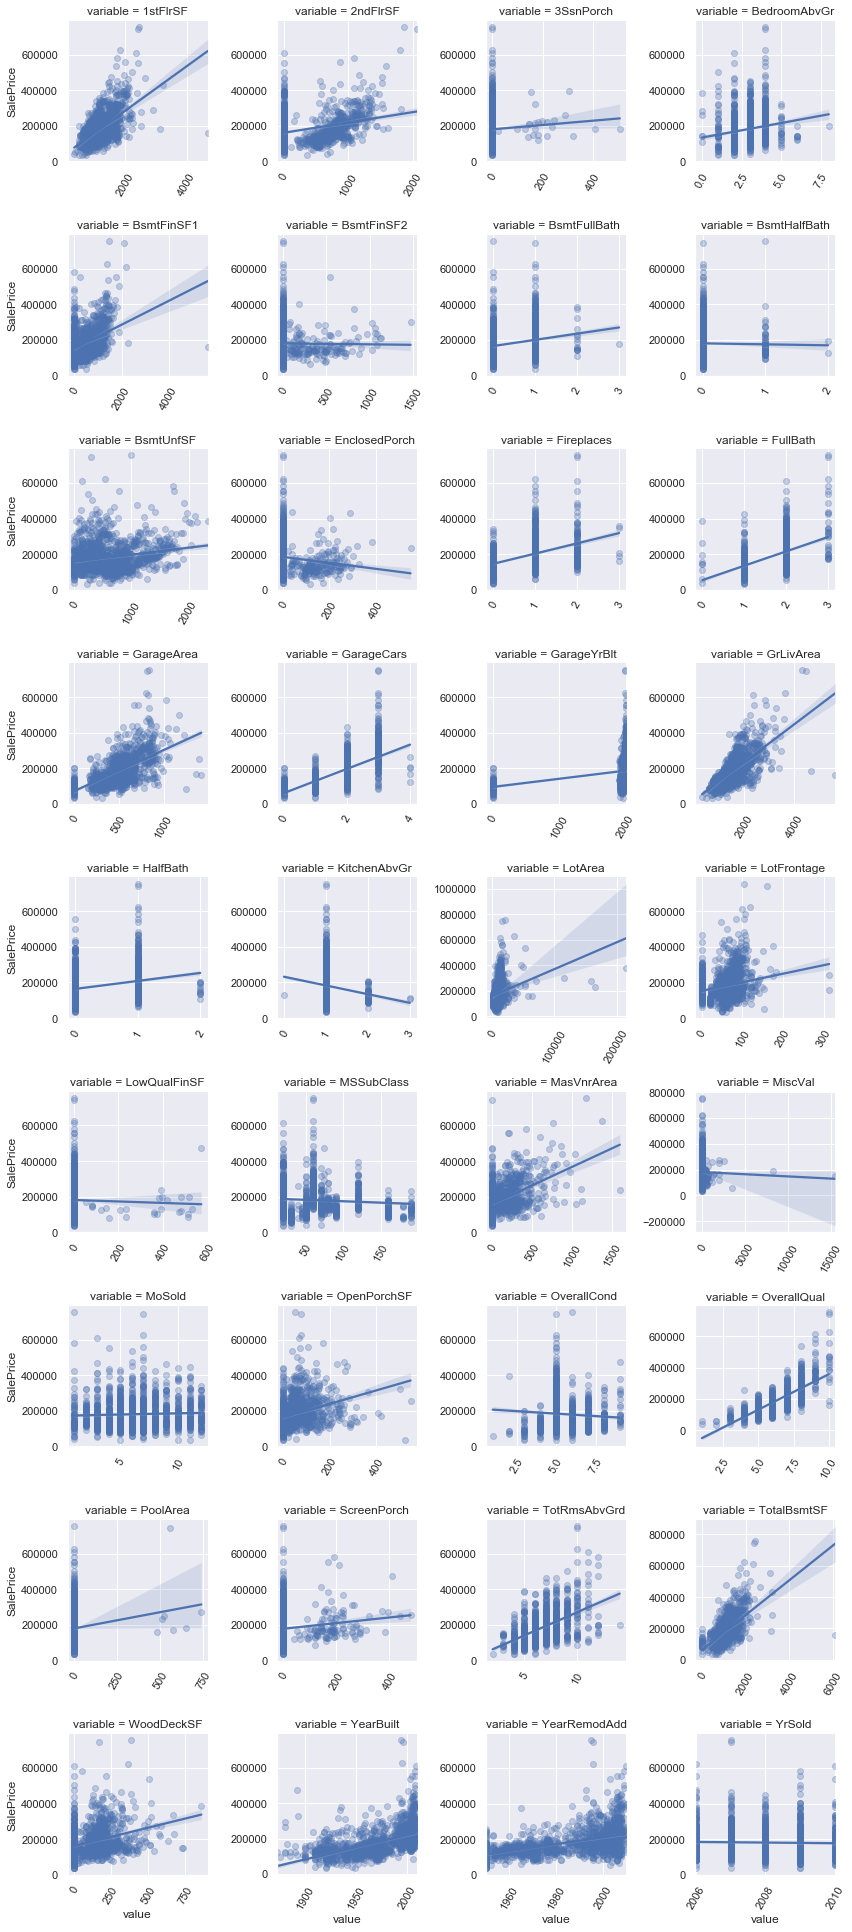

<Figure size 842.4x595.44 with 0 Axes>

In [137]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

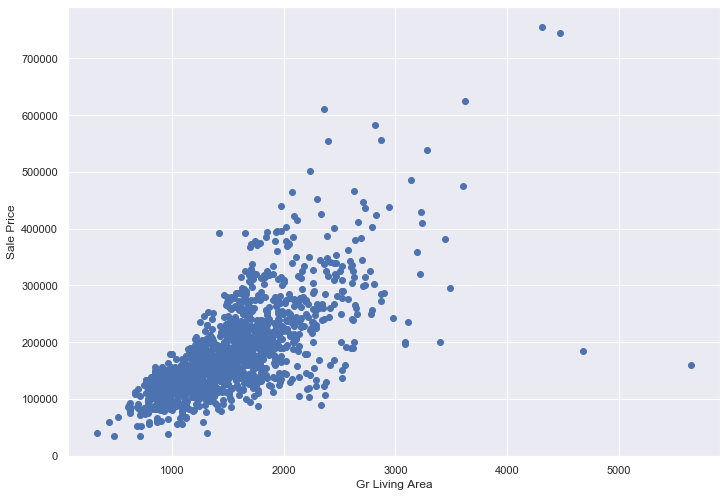

In [151]:
plt.scatter("GrLivArea", "SalePrice", data=df_train)
plt.xlabel("Gr Living Area")
plt.ylabel("Sale Price")
plt.savefig("E:/eda plots/plot6.jpg", bbox_inches='tight')

In [174]:
df_train = df_train[df_train.GrLivArea < 4000] 

In [180]:
df_train.shape

(1456, 81)